# **Task 1**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plot
import matplotlib.cm as cm
import numpy as np


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
generated_train=open('generated_train.csv', 'r')
generated_test=open('generated_test.csv', 'r')


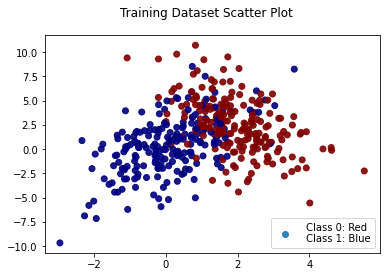

In [ ]:
Y=pd.read_csv(generated_train, sep=',', header=None, usecols=[0,1,2])
plot.figure()
plot.scatter(Y[0], Y[1], c = Y[2], label = " Class 0: Red \n Class 1: Blue", marker="o", alpha=.9, cmap='jet')
plot.suptitle('Training Dataset Scatter Plot')
plot.legend()
plot.show()

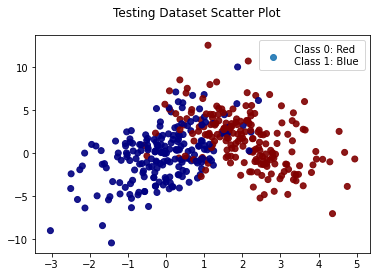

In [ ]:
X=pd.read_csv(generated_test , sep=',', header=None, usecols=[0,1,2])
plot.figure()
plot.scatter(X[0],X[1],c=X[2],label = " Class 0: Red  \n Class 1: Blue",marker="o",alpha=.9, cmap='jet')
plot.suptitle('Testing Dataset Scatter Plot')
plot.legend()
plot.show()
 

# **Task 2**

In [ ]:
import numpy as num
import pandas
import matplotlib.pyplot as plot
import numpy as np
import math

In [ ]:
train_gne=open('generated_train.csv', 'r')

X1=pandas.read_csv(train_gne ,sep=',',header=None,usecols=[0,1,2])
#X1=pandas.DataFrame.values(X1)
X1 = pandas.DataFrame.to_numpy(X1)
print(len(X1))


400


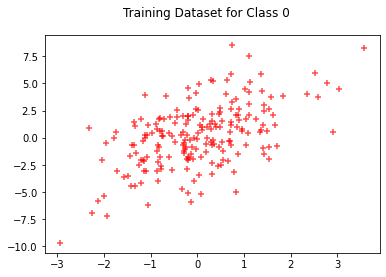

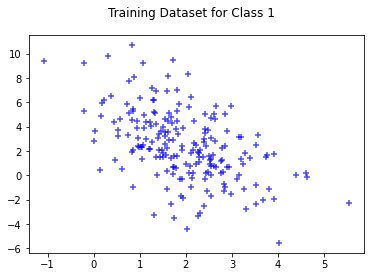

In [ ]:
class1_x=[]
class1_y=[]
class0_x=[]
class0_y=[]

for i in range(len(X1)):
	if X1[i][2]==1:
		c=X1[i][0]
		d=X1[i][1]
		class1_x.append(c)
		class1_y.append(d)
	else:
		c1=X1[i][0]
		d1=X1[i][1]
		class0_x.append(c1)
		class0_y.append(d1)

class1_x=np.asarray((class1_x))
class1_y=np.asarray((class1_y))

class0_x=np.asarray((class0_x))
class0_y=np.asarray((class0_y))

class1=[class1_x, class1_y]
class0=[class0_x, class0_y]


plot.scatter(class0_x,class0_y, color='red', marker="+", alpha=0.7)
plot.suptitle('Training Dataset for Class 0')
plot.show()

plot.scatter(class1_x,class1_y, color='blue', marker="+", alpha=0.7)
plot.suptitle('Training Dataset for Class 1')
plot.show()

In [ ]:
mean0=np.matrix(np.array([[np.mean(class0_x)],[np.mean(class0_y)]]));
mean1=np.matrix(np.array([[np.mean(class1_x)],[np.mean(class1_y)]]));

priorclass0=len(class0_x)/len(X1)
priorclass1=len(class1_x)/len(X1)

cov0=np.matrix(np.cov(class0_x, class0_y));
cov1=np.matrix(np.cov(class1_x, class1_y));

probclass0=num.zeros([400,1])
probclass1=num.zeros([400,1])
estID=num.zeros([400,1])

for i in range(0,400):
# x is each new incoming data point from the testing data set...
      x=np.matrix(X1[i,0:2]);
      x=x.transpose();
      power0=-0.5*(((np.matrix.transpose(x-mean0))*((num.linalg.inv(cov0))*(x-mean0))));
      power1=-0.5*(((np.matrix.transpose(x-mean1))*((num.linalg.inv(cov1))*(x-mean1))));
      probclass0[i,0]=priorclass0 * ( (1/((2*num.math.pi)*num.math.sqrt(num.linalg.det(cov0))))*num.math.exp(power0));
      probclass1[i,0]=priorclass1 * ( (1/((2*num.math.pi)*num.math.sqrt(num.linalg.det(cov1))))*num.math.exp(power1));
      if((probclass0[i,0])>( probclass1[i,0])):
              estID[i]=0;
      else:
              estID[i]=1;

total1_test=num.sum(estID)
print(total1_test)

error=0.0;
correct=0.0;

for n in range(0,400):
   if int(estID[n])==int(X1[n,2]):
     correct=correct+1;
   else:
     error=error+1;

print('percentage of correct of traininging data-set')
print(correct/400)
print('percentage of error of training data-set')
print(error/400)

222.0
percentage of correct of traininging data-set
0.86
percentage of error of training data-set
0.14


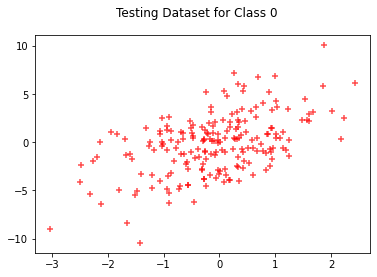

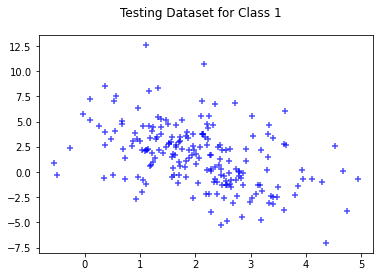

207.0
percentage of correct for testing data-set
0.8775
percentage of error of testing data_set
0.1225


In [ ]:
#=========================== Testing Dataset =================================#

test_gne=open('generated_test.csv', 'r')

X=pandas.read_csv(test_gne ,sep=',',header=None,usecols=[0,1,2])
X=pandas.DataFrame.to_numpy(X)

class1_x=[]
class1_y=[]
class0_x=[]
class0_y=[]

for i in range(len(X)):
	if X[i][2]==1:
		c=X[i][0]
		d=X[i][1]
		class1_x.append(c)
		class1_y.append(d)
	else:
		c1=X[i][0]
		d1=X[i][1]
		class0_x.append(c1)
		class0_y.append(d1)

class1_x=np.asarray((class1_x))
class1_y=np.asarray((class1_y))

class0_x=np.asarray((class0_x))
class0_y=np.asarray((class0_y))

class1=[class1_x, class1_y]
class0=[class0_x, class0_y]


plot.scatter(class0_x,class0_y, color='red', marker="+", alpha=0.7)
plot.suptitle('Testing Dataset for Class 0')
plot.show()

plot.scatter(class1_x,class1_y, color='blue', marker="+", alpha=0.7)
plot.suptitle('Testing Dataset for Class 1')
plot.show()

#====================== Mean & Variance Calculation ========================#

mean0=np.matrix(np.array([[np.mean(class0_x)],[np.mean(class0_y)]]));
mean1=np.matrix(np.array([[np.mean(class1_x)],[np.mean(class1_y)]]));

priorclass0=len(class0_x)/len(X)
priorclass1=len(class1_x)/len(X)

cov0=np.matrix(np.cov(class0_x, class0_y));
cov1=np.matrix(np.cov(class1_x, class1_y));

probclass0=num.zeros([400,1])
probclass1=num.zeros([400,1])
estID=num.zeros([400,1])

for i in range(400):
# x is each new incoming data point from the testing data set...
      x=np.matrix(X[i,0:2]);
      x=x.transpose();
      power0=-0.5*(((np.matrix.transpose(x-mean0))*((num.linalg.inv(cov0))*(x-mean0))));
      power1=-0.5*(((np.matrix.transpose(x-mean1))*((num.linalg.inv(cov1))*(x-mean1))));
      probclass0[i,0]=priorclass0 * ( (1/((2*num.math.pi)*num.math.sqrt(num.linalg.det(cov0))))*num.math.exp(power0));
      probclass1[i,0]=priorclass1 * ( (1/((2*num.math.pi)*num.math.sqrt(num.linalg.det(cov1))))*num.math.exp(power1));
      if((probclass0[i,0])>( probclass1[i,0])):
              estID[i]=0;
      else:
              estID[i]=1;

total1_test=num.sum(estID)
print(total1_test)

error=0.0;
correct=0.0;

for n in range(0,400):
   if int(estID[n])==int(X[n,2]):
     correct=correct+1;
   else:
     error=error+1;

print('percentage of correct for testing data-set')
print(correct/400)
print('percentage of error of testing data_set')
print(error/400)

#================================= End =======================================#


# **Task 3**

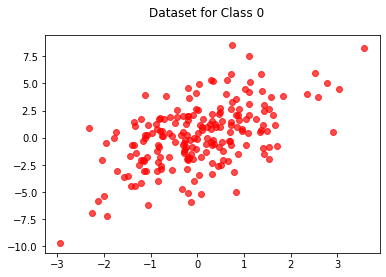

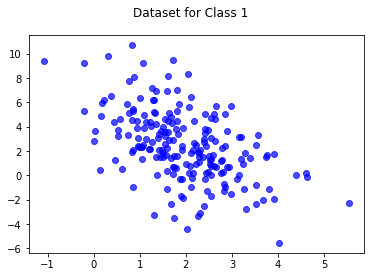


 naive bayes classifier:

Total 1 class found in  training
222.0
percentage of correct for training data-set
0.85
percentage of error of training data_set
0.15


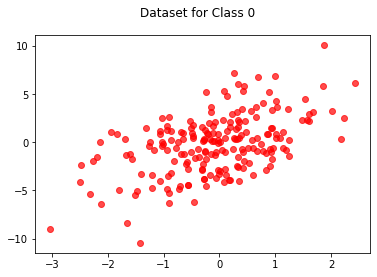

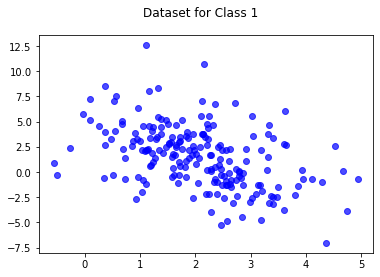


 naive bayes classifier:

Total 1 class found in test
209.0
percentage of correct for testing data-set
0.8725
percentage of error of testing data_set
0.1275


In [ ]:
import numpy as num
import pandas
import matplotlib.pyplot as plot
import numpy as np
import math as m

#============================== Start ======================================#
#================================ Train ===================================#

train_gne=open('generated_train.csv', 'r')

X1=pandas.read_csv(train_gne ,sep=',',header=None,usecols=[0,1,2])
X1=pandas.DataFrame.to_numpy(X1)

class1_x=[]
class1_y=[]
class0_x=[]
class0_y=[]

for i in range(len(X1)):
	if X1[i][2]==1:
		c=X1[i][0]
		d=X1[i][1]
		class1_x.append(c)
		class1_y.append(d)
	else:
		c1=X1[i][0]
		d1=X1[i][1]
		class0_x.append(c1)
		class0_y.append(d1)

class1_x=np.asarray((class1_x))
class1_y=np.asarray((class1_y))

class0_x=np.asarray((class0_x))
class0_y=np.asarray((class0_y))

class1=[class1_x, class1_y]
class0=[class0_x, class0_y]


plot.scatter(class0_x,class0_y, color='red', marker="o", alpha=0.7)
plot.suptitle('Dataset for Class 0')
plot.show()

plot.scatter(class1_x,class1_y, color='blue', marker="o", alpha=0.7)
plot.suptitle('Dataset for Class 1')
plot.show()

#========================== Mean calculation ================================#

mean01=np.matrix(np.mean(class0_y))
mean00=np.matrix(np.mean(class0_x))
mean11=np.matrix(np.mean(class1_y))
mean10=np.matrix(np.mean(class1_x))

var01=np.matrix(np.var(class0_y))
var00=np.matrix(np.var(class0_x))
var11=np.matrix(np.var(class1_y))
var10=np.matrix(np.var(class1_x))

priorclass0=len(class0_x)/len(X1)
priorclass1=len(class1_x)/len(X1)

probclass0=np.zeros([400,1])
probclass1=np.zeros([400,1])
estID=np.zeros([400,1]);

print('\n naive bayes classifier:\n')
for n in range(0,400):

    x1=np.matrix(X1[n,0]);
    x2=np.matrix(X1[n,1]);
    power01 = (-0.5 * (m.pow((x1 - mean00),2)) ) / var00;
    power02 = (-0.5 * (m.pow((x2 - mean01),2)) ) / var01;
    power11 = (-0.5 * (m.pow((x1 - mean10),2)) ) / var10;
    power12 = (-0.5 * (m.pow((x2 - mean11),2) )) / var11;

    #probclass0[n, 0] = priorclass0 * (1 / ((2 * m.pi) * m.sqrt(var00 * var01)) * m.exp(power01) * m.exp(power02));
    #probclass1[n, 0] = priorclass1 * (1 / ((2 * m.pi) * m.sqrt(var10 * var11)) * m.exp(power11) * m.exp(power12));
    probclass0[n, 0] = priorclass0 * (1 / (m.sqrt((2 * m.pi) * (var00 * var01))) * m.exp(power01) * m.exp(power02));
    probclass1[n, 0] = priorclass1 * (1 / (m.sqrt((2 * m.pi) * (var10 * var11))) * m.exp(power11) * m.exp(power12));

    if((probclass0[n,0])>( probclass1[n,0])):
        estID[n]=0;
    else:
        estID[n]=1;

print('Total 1 class found in  training');total1_train=np.sum(estID)
print(total1_train)
error=0;
correct=0;
for n in range(400):
    if int(estID[n])==int(X1[n,2]):
        correct=correct+1;
    else:
        error=error+1;

print('percentage of correct for training data-set')
print(correct/400)
print('percentage of error of training data_set')
print(error/400)

#================================ Test ===================================#

test_gne=open('generated_test.csv', 'r')

X=pandas.read_csv(test_gne ,sep=',',header=None,usecols=[0,1,2])
X=pandas.DataFrame.to_numpy(X)

class1_x=[]
class1_y=[]
class0_x=[]
class0_y=[]

for i in range(len(X)):
	if X[i][2]==1:
		c=X[i][0]
		d=X[i][1]
		class1_x.append(c)
		class1_y.append(d)
	else:
		c1=X[i][0]
		d1=X[i][1]
		class0_x.append(c1)
		class0_y.append(d1)

class1_x=np.asarray((class1_x))
class1_y=np.asarray((class1_y))

class0_x=np.asarray((class0_x))
class0_y=np.asarray((class0_y))

class1=[class1_x, class1_y]
class0=[class0_x, class0_y]


plot.scatter(class0_x,class0_y, color='red', marker="o", alpha=0.7)
plot.suptitle('Dataset for Class 0')
plot.show()

plot.scatter(class1_x,class1_y, color='blue', marker="o", alpha=0.7)
plot.suptitle('Dataset for Class 1')
plot.show()

#========================== Mean calculation ================================#

mean01=np.matrix(np.mean(class0_y))
mean00=np.matrix(np.mean(class0_x))
mean11=np.matrix(np.mean(class1_y))
mean10=np.matrix(np.mean(class1_x))

var01=np.matrix(np.var(class0_y))
var00=np.matrix(np.var(class0_x))
var11=np.matrix(np.var(class1_y))
var10=np.matrix(np.var(class1_x))

priorclass0=len(class0_x)/len(X)
priorclass1=len(class1_x)/len(X)

probclass0=np.zeros([400,1])
probclass1=np.zeros([400,1])
estID=np.zeros([400,1]);

print('\n naive bayes classifier:\n')
for n in range(0,400):

    x1=np.matrix(X[n,0]);
    x2=np.matrix(X[n,1]);
    power01 = (-0.5 * (m.pow((x1 - mean00),2)) ) / var00;
    power02 = (-0.5 * (m.pow((x2 - mean01),2)) ) / var01;
    power11 = (-0.5 * (m.pow((x1 - mean10),2)) ) / var10;
    power12 = (-0.5 * (m.pow((x2 - mean11),2) )) / var11;

    #probclass0[n, 0] = priorclass0 * (1 / ((2 * m.pi) * m.sqrt(var00 * var01)) * m.exp(power01) * m.exp(power02));
    #probclass1[n, 0] = priorclass1 * (1 / ((2 * m.pi) * m.sqrt(var10 * var11)) * m.exp(power11) * m.exp(power12));
    probclass0[n, 0] = priorclass0 * (1 / (m.sqrt((2 * m.pi) * (var00 * var01))) * m.exp(power01) * m.exp(power02));
    probclass1[n, 0] = priorclass1 * (1 / (m.sqrt((2 * m.pi) * (var10 * var11))) * m.exp(power11) * m.exp(power12));

    if((probclass0[n,0])>( probclass1[n,0])):
        estID[n]=0;
    else:
        estID[n]=1;

print('Total 1 class found in test');total1_train=np.sum(estID)
print(total1_train)
error=0;
correct=0;
for n in range(400):
    if int(estID[n])==int(X[n,2]):
        correct=correct+1;
    else:
        error=error+1;

print('percentage of correct for testing data-set')
print(correct/400)
print('percentage of error of testing data_set')
print(error/400)


#=============================== End =======================================#



# **Task 4**

In [1]:
import numpy as num
import pandas
import matplotlib.pyplot as plot
import numpy as np

#============================= Start =======================================#

test_gne= open('generated_test.csv', 'r')
train_gne= open('generated_train.csv', 'r')

X = pandas.read_csv(test_gne, sep=',', header=None, usecols=[0, 1, 2])
Y = pandas.read_csv(train_gne, sep=',', header=None, usecols=[0, 1, 2])

numpy_X = pandas.DataFrame.to_numpy(X)
numpy_Y = pandas.DataFrame.to_numpy(Y)

x_class0 = num.zeros((200, 3), dtype='float')
x_class1 = num.zeros((200, 3), dtype='float')
y_class0 = num.zeros((200, 3), dtype='float')
y_class1 = num.zeros((200, 3), dtype='float')

l = 0
k = 0
for i in range(400):
    if (numpy_Y[i][2] == 0):
        y_class0[l] = numpy_Y[i]
        l = l + 1
    else:

        y_class1[k] = numpy_Y[i]
        k = k + 1
l = 0
k = 0
for i in range(400):
    if (numpy_X[i][2] == 0):
        x_class0[l] = numpy_X[i]
        l = l + 1
    else:

        x_class1[k] = numpy_X[i]
        k = k + 1

# y_class0=y_class0[:,0:2]
# print y_class0
# y_class1=y_class1[:,0:2]
prob_class0 = num.zeros((400, 1), dtype='float')
prob_class1 = num.zeros((400, 1), dtype='float')

classID = num.zeros([400, 1])

sum0 = 0.0
sum1 = 0.0
# print numpy_X


for h in range(1, 20, 6):
    h = h / 10.0;
    # count = count + 1;
    for i in range(0, 400):
        sum0 = 0;
        for m in range(0, 200):
            power0 = (-np.math.pow((np.matrix(numpy_X[i, 0]) - np.matrix(y_class0[m, 0])), 2) -
                      np.math.pow((np.matrix(numpy_X[i, 1]) - np.matrix(y_class0[m, 1])), 2) / (
                                  2.0 * (np.math.pow(h, 2))));
            sum0 = sum0 + np.math.exp(power0);
        prob_class0[i, 0] = (0.5 * sum0) / (200 * 2.0 * np.math.pi * np.math.pow(h, 2.0));
        sum1 = 0;
        for m in range(0, 200):
            power1 = (-np.math.pow((np.matrix(numpy_X[i, 0]) - np.matrix(y_class1[m, 0])), 2) -
                      np.math.pow((np.matrix(numpy_X[i, 1]) - np.matrix(y_class1[m, 1])), 2) / (
                                  2.0 * (np.math.pow(h, 2))));
            sum1 = sum1 + np.math.exp(power1);
        prob_class1[i, 0] = (0.5 * sum1) / (200 * 2.0 * np.math.pi * np.math.pow(h, 2.0));
        if prob_class0[i, 0] > prob_class1[i, 0]:
            classID[i] = 0;
        else:
            classID[i] = 1;
    correct = 0.0;
    error = 0.0;
    for n in range(0, 400):
        if int(classID[n]) == int(numpy_X[n, 2]):
            correct = correct + 1;
        else:
            error = error + 1;

    print('percentage of correct');
    print(h)
    print(correct * 100 / 400)
    
#============================= End =======================================#

percentage of correct
0.1
84.0
percentage of correct
0.7
88.0
percentage of correct
1.3
88.5
percentage of correct
1.9
88.75


# **Task 5**

In [3]:
from __future__ import division
import numpy as np
import scipy.io
#import scipy.io as sc
#import matplotlib.cm as cm
#import matplotlib.pyplot as plt
#import numpy as num
#import os
#import math
#import numpy as np

#=============================== Start ======================================#

mat2 = scipy.io.loadmat('testing_zipcode.mat')
mat1 = scipy.io.loadmat('training_zipcode.mat')
data_train=mat1['data'];
data_test=mat2['data'];
datatest=data_test;
datatrain=data_train;

dist_data=np.zeros([datatest.shape[0],datatest.shape[1]],dtype='float')
dsts=np.zeros([datatest.shape[0],1],dtype='float')
print('\n KNN classifier for zip code data\n')
estID=np.zeros([3000,1],dtype='float')
for k in range(3,15,4):
   for i in range(0,3000):
      probclass = np.zeros([10, 1], dtype='float')
      for j in range(0,3000):

          dist_data[j,:]=datatest[i,:]-datatrain[j,:];
          sqre=map(lambda x: x ** 2, dist_data[j,:])
          dsts[j]=np.math.sqrt(sum(sqre))

      x = np.array(sorted(dsts))
      sort1 = np.matrix(sorted(range(len(dsts)), key=lambda x: dsts[x]))
      sort2 = sort1.transpose()
      knearID = np.array(sort2[0:k, :])

      for l in range(0, k):
         c = data_train[knearID[l, 0], 16]
         c=int(c)
         probclass[c-1,0]+=1

      estID[i]=(np.argmax(probclass)+1)

   error_test = 0.0;
   correct_test = 0.0;
   for n in range(0, 3000):
      if int(estID[n]) == int(data_test[n, 16]):
         correct_test = correct_test + 1;
      else:
         error_test = error_test + 1;
   print ('\n searching nearest neighbour for');
   print (k);
   print('percentage of accuracy training')
   print(correct_test / 3000);
   print('percentage of error training')
   print(error_test / 3000);

#=============================== End ======================================#


 KNN classifier for zip code data


 searching nearest neighbour for
3
percentage of accuracy training
0.955
percentage of error training
0.045

 searching nearest neighbour for
7
percentage of accuracy training
0.9353333333333333
percentage of error training
0.06466666666666666

 searching nearest neighbour for
11
percentage of accuracy training
0.9176666666666666
percentage of error training
0.08233333333333333


# **Task 6: Decision Boundary Bayes Classifier**

In [ ]:
import numpy as num
import pandas
import matplotlib.pyplot as plot
import numpy as np
import math

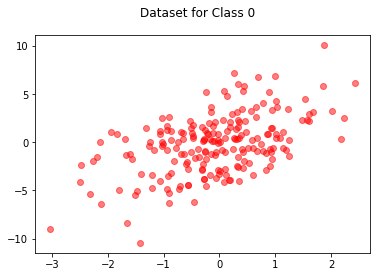

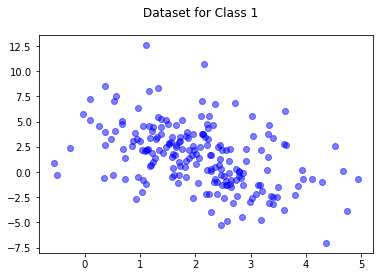

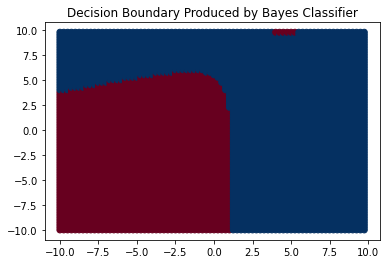

In [ ]:
#=============================== Start ======================================#

f=open('generated_test.csv', 'r')
g=open('generated_train.csv', 'r')

X=pandas.read_csv(f ,sep=',',header=None,usecols=[0,1,2])
X=pandas.DataFrame.to_numpy(X)

class1_x=[]
class1_y=[]
class0_x=[]
class0_y=[]

for i in range(len(X)):
	if X[i][2]==1:
		c=X[i][0]
		d=X[i][1]
		class1_x.append(c)
		class1_y.append(d)
	else:
		c1=X[i][0]
		d1=X[i][1]
		class0_x.append(c1)
		class0_y.append(d1)

class1_x=np.asarray((class1_x))
class1_y=np.asarray((class1_y))

class0_x=np.asarray((class0_x))
class0_y=np.asarray((class0_y))

class1=[class1_x, class1_y]
class0=[class0_x, class0_y]


plot.scatter(class0_x,class0_y, color='red', marker="o", alpha=0.5)
plot.suptitle('Dataset for Class 0')
plot.show()

plot.scatter(class1_x,class1_y, color='blue', marker="o", alpha=0.5)
plot.suptitle('Dataset for Class 1')
plot.show()

#======================= Mean & Variance Calculation ========================#

mean0=np.matrix(np.array([[np.mean(class0_x)],[np.mean(class0_y)]]));
mean1=np.matrix(np.array([[np.mean(class1_x)],[np.mean(class1_y)]]));

priorclass0=len(class0_x)/len(X)
priorclass1=len(class1_x)/len(X)

cov0=np.matrix(np.cov(class0_x, class0_y));
cov1=np.matrix(np.cov(class1_x, class1_y));

probclass0=num.zeros([400,1])
probclass1=num.zeros([400,1])
estID=num.zeros([400,1])

# testing Classiier

count1 = 0;
data = np.zeros([6400, 2]);
for i in range(-40, 40, 1):

    for j in range(-40, 40, 1):
        data[count1, 0] = i / 4;
        data[count1, 1] = j / 4;
        count1 = count1 + 1;

testMatrixXY = data;

probclass0_test = np.zeros([6400, 1])
probclass1_test = np.zeros([6400, 1])
estID_test = np.zeros([6400, 1]);

for n in range(0, 6400):

    x_t = np.matrix(testMatrixXY[n, :]);
    x_t = x_t.transpose();
    power0_t = -0.5 * (((np.matrix.transpose(x_t - mean0)) * ((np.linalg.inv(cov0)) * (x_t - mean0))));
    power1_t = -0.5 * (((np.matrix.transpose(x_t - mean1)) * ((np.linalg.inv(cov1)) * (x_t - mean1))));
    probclass0_test[n, 0] = priorclass0 * ((1 / ((2 * math.pi) * math.sqrt(np.linalg.det(cov0)))) * math.exp(power0_t));
    probclass1_test[n, 0] = priorclass1 * ((1 / ((2 * math.pi) * math.sqrt(np.linalg.det(cov1)))) * math.exp(power1_t));
    if ((probclass0_test[n, 0]) > (probclass1_test[n, 0])):
        estID_test[n] = 0;
    else:
        estID_test[n] = 1;

plot.scatter(data[:, 0], data[:, 1], c=estID_test.ravel(), cmap='RdBu', marker='o')
plot.title('Decision Boundary Produced by Bayes Classifier')
plot.show()

#=============================== End ======================================#

# **Task 6: Decision Boundary for Naive Bayes Classifier**

In [ ]:
import numpy as num
import pandas
import matplotlib.pyplot as plot
import numpy as np
import math 

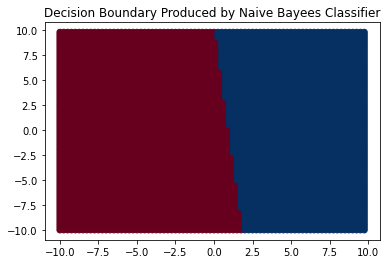

In [ ]:
#================================ Start ======================================#

test_gne=open('generated_test.csv', 'r')
train_gne=open('generated_train.csv', 'r')

X=pandas.read_csv(test_gne ,sep=',',header=None,usecols=[0,1,2])
X=pandas.DataFrame.to_numpy(X)

class1_x=[]
class1_y=[]
class0_x=[]
class0_y=[]

for i in range(len(X)):
	if X[i][2]==1:
		c=X[i][0]
		d=X[i][1]
		class1_x.append(c)
		class1_y.append(d)
	else:
		c1=X[i][0]
		d1=X[i][1]
		class0_x.append(c1)
		class0_y.append(d1)

class1_x=np.asarray((class1_x))
class1_y=np.asarray((class1_y))

class0_x=np.asarray((class0_x))
class0_y=np.asarray((class0_y))

class1=[class1_x, class1_y]
class0=[class0_x, class0_y]


#================================ Mean ======================================#

mean01=np.matrix(np.mean(class0_y))
mean00=np.matrix(np.mean(class0_x))
mean11=np.matrix(np.mean(class1_y))
mean10=np.matrix(np.mean(class1_x))

var01=np.matrix(np.var(class0_y))
var00=np.matrix(np.var(class0_x))
var11=np.matrix(np.var(class1_y))
var10=np.matrix(np.var(class1_x))

priorclass0=len(class0_x)/len(X)
priorclass1=len(class1_x)/len(X)

probclass0=np.zeros([400,1])
probclass1=np.zeros([400,1])
estID=np.zeros([400,1]);

count1 = 0;
data = np.zeros([6400, 2]);
for i in range(-40, 40, 1):

    for j in range(-40, 40, 1):
        data[count1, 0] = i / 4;
        data[count1, 1] = j / 4;
        count1 = count1 + 1;

testMatrixXY = data;

probclass0_test=np.zeros([6400,1])
probclass1_test=np.zeros([6400,1])
estID_test=np.zeros([6400,1]);

for n in range(0,6400):

    x1_t=np.matrix(testMatrixXY[n,0]);
    x2_t=np.matrix(testMatrixXY[n,1]);
    power01 = (-0.5 * (math.pow((x1_t - mean00),2)) ) / var00;
    power02 = (-0.5 * (math.pow((x2_t - mean01),2)) ) / var01;
    power11 = (-0.5 * (math.pow((x1_t - mean10),2)) ) / var10;
    power12 = (-0.5 * (math.pow((x2_t - mean11),2) )) / var11;

    probclass0_test[n, 0]=priorclass0 * (1 / ((2 * math.pi) * math.sqrt(var00 * var01)) * math.exp(power01) * math.exp(power02));
    probclass1_test[n, 0]=priorclass1 * (1 / ((2 * math.pi) * math.sqrt(var10 * var11)) * math.exp(power11) * math.exp(power12));

    if((probclass0_test[n,0])>( probclass1_test[n,0])):
        estID_test[n]=0;
    else:
        estID_test[n]=1;

plot.scatter(data[:, 0], data[:, 1], c=estID_test.ravel(), cmap='RdBu', marker='o')
plot.title('Decision Boundary Produced by Naive Bayees Classifier')
plot.show()

#================================ End ======================================#

# **Task 6: Decision Boundary for Nonparametric**

In [ ]:
import numpy as num
import pandas
import matplotlib.pyplot as plot
import numpy as np

h Value
1.1
Accuracy in Percentage(%)
50.75


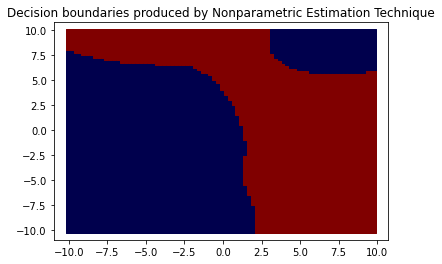

In [ ]:

#=============================== Start =======================================#

test_gne=open('generated_test.csv', 'r')
train_gne=open('generated_train.csv', 'r')

X=pandas.read_csv(test_gne ,sep=',',header=None,usecols=[0,1,2])
Y=pandas.read_csv(train_gne ,sep=',',header=None,usecols=[0,1,2])

numpy_X=np.array(pandas.DataFrame.to_numpy(X))
numpy_Y=np.array(pandas.DataFrame.to_numpy(Y))

train_x=num.zeros((400,3),dtype='float')
train_y=num.zeros((400,3),dtype='float')
test_x=num.zeros((400,3),dtype='float')
test_y=num.zeros((400,3),dtype='float')

count1 = 0;
tdata = np.zeros([6400, 2]);
for i in range(-40, 40, 1):

    for j in range(-40, 40, 1):
        tdata[count1, 0] = i / 4;
        tdata[count1, 1] = j / 4;
        count1 = count1 + 1;

test_x= np.matrix(tdata[:, 0])
test_x=np.transpose(test_x)
test_y=np.matrix(tdata[:, 1])
test_y=np.transpose(test_y)

x_class0=num.zeros((200,3),dtype='float')
x_class1=num.zeros((200,3),dtype='float')
y_class0=num.zeros((200,3),dtype='float')
y_class1=num.zeros((200,3),dtype='float')
l = 0
k = 0
for i in range(400):
    if (numpy_Y[i][2] == 0):
        y_class0[l] = numpy_Y[i]
        l = l + 1
    else:

        y_class1[k] = numpy_Y[i]
        k = k + 1
l = 0
k = 0
for i in range(400):
    if (numpy_X[i][2] == 0):
        x_class0[l] = numpy_X[i]
        l = l + 1
    else:

        x_class1[k] = numpy_X[i]
        k = k + 1

# y_class0=y_class0[:,0:2]
# print y_class0
# y_class1=y_class1[:,0:2]
prob_class0 = num.zeros((6400, 1), dtype='float')
prob_class1 = num.zeros((6400, 1), dtype='float')

classID = num.zeros([6400, 1])

sum0 = 0.0
sum1 = 0.0
# print numpy_X


for h in range(11, 13, 2):
    h = h / 10.0;
    # count = count + 1;
    for i in range(0, 6400):
        sum0 = 0;
        for m in range(0, 200):
            power0 = (-np.math.pow((np.matrix(test_x[i, 0]) - np.matrix(y_class0[m, 0])), 2) -
                      np.math.pow((np.matrix(test_y[i, 0]) - np.matrix(y_class0[m, 1])), 2) / (
                      2.0 * (np.math.pow(h, 2))));
            sum0 = sum0 + np.math.exp(power0);
        prob_class0[i, 0] = (0.5 * sum0) / (200 * 2.0 * np.math.pi * np.math.pow(h, 2.0));
        sum1 = 0;
        for m in range(0, 200):
            power1 = (-np.math.pow((np.matrix(test_x[i, 0]) - np.matrix(y_class1[m, 0])), 2) -
                      np.math.pow((np.matrix(test_y[i, 0]) - np.matrix(y_class1[m, 1])), 2) / (
                      2.0 * (np.math.pow(h, 2))));
            sum1 = sum1 + np.math.exp(power1);
        prob_class1[i, 0] = (0.5 * sum1) / (200 * 2.0 * np.math.pi * np.math.pow(h, 2.0));
        if prob_class0[i, 0] > prob_class1[i, 0]:
            classID[i] = 0;
        else:
            classID[i] = 1;
    correct = 0.0;
    error = 0.0;
    for n in range(0, 400):
        if int(classID[n]) == int(numpy_X[n, 2]):
            correct = correct + 1;
        else:
            error = error + 1;

    print("h Value")
    print(h)
    print('Accuracy in Percentage(%)');
    print(correct * 100 / 400)

plot.scatter([test_x], [test_y], c=[classID], cmap=plot.cm.seismic, marker='s')
plot.title('Decision boundaries produced by Nonparametric Estimation Technique')
plot.show()

#=============================== End =======================================#

# **Task 6: Decision Boundary for KNN Classifier**

value of k
3
percentage of accuracy for training
0.5025
percentage of error for training
0.4975


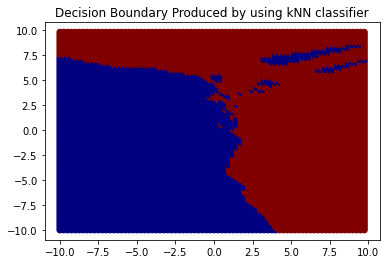

In [ ]:
import numpy as num
import pandas
import matplotlib.pyplot as plot
import numpy as np

#=============================== Start =======================================#

test_gne=open('generated_test.csv', 'r')
train_gne=open('generated_train.csv', 'r')

X=pandas.read_csv(test_gne ,sep=',',header=None,usecols=[0,1,2])
Y=pandas.read_csv(train_gne ,sep=',',header=None,usecols=[0,1,2])

numpy_X=np.array(pandas.DataFrame.to_numpy(X))
numpy_Y=np.array(pandas.DataFrame.to_numpy(Y))

train_x=num.zeros((400,3),dtype='float')
train_y=num.zeros((400,3),dtype='float')
test_x=num.zeros((400,3),dtype='float')
test_y=num.zeros((400,3),dtype='float')

count1 = 0;
tdata = np.zeros([6400, 2]);
for i in range(-40, 40, 1):

    for j in range(-40, 40, 1):
        tdata[count1, 0] = i / 4;
        tdata[count1, 1] = j / 4;
        count1 = count1 + 1;


test_x= np.matrix(tdata[:, 0])
test_x=np.transpose(test_x)
test_y=np.matrix(tdata[:, 1])
test_y=np.transpose(test_y)
train_x=(numpy_Y[:,0:1])
train_y=(numpy_Y[:,1:2])
Pr_CL_0=num.zeros((6400,1),dtype='float')
Pr_CL_1=num.zeros((6400,1),dtype='float')
Clssfd_ID=num.zeros((6400,1),dtype='float')
distance=num.zeros((400,1),dtype='float')


for k in range (3,5,2):
    for j in range (0,6400):
        for r in range (0,400):
            a= np.math.pow((test_x[j]-train_x[r]),2);
            b = np.math.pow((test_y[j] - train_y[r]), 2);
            distance[r,0]= np.math.sqrt(a+b);
        x=np.array(sorted(distance))
        y=np.matrix(sorted(range(len(distance)), key=lambda x: distance[x]))
        y=y.transpose()

        z=np.concatenate((x,y),axis=1)


        k_near=np.array(y[0:k,:])
        n0=0;
        n1=0;


        for l in range(0,k):
            if numpy_Y[k_near[l,0],2]==0:
                n0+=1;
            else:
                n1+=1;

        L_0 = n0;
        #print L_0
        Pr_CL_0[j, 0] = (L_0 / k)+0.0;


        Pr_CL_1[j, 0] = 1 - Pr_CL_0[j, 0];
        if Pr_CL_0[j, 0] > Pr_CL_1[j, 0]:
            Clssfd_ID[j, 0] = 0;
        else:
            Clssfd_ID[j, 0] = 1;

    total1_train = np.sum(Clssfd_ID);
    #print(Pr_CL_0)
    error = 0.0;
    correct = 0.0;
    for n in range(0, 400):
        if int(Clssfd_ID[n]) == int(numpy_X[n, 2]):
            correct = correct + 1;
        else:
            error = error + 1;
    print ('value of k');
    print (k);
    print('percentage of accuracy for training')
    print(correct / 400);
    print('percentage of error for training')
    print(error / 400);



plot.scatter([test_x], [test_y], c=[Clssfd_ID], cmap='jet', marker='o')
plot.title('Decision Boundary Produced by using kNN classifier')
plot.show()

#=============================== End =======================================#